In [1]:
# MatPlotLib inline magic command 
%matplotlib inline 
# Dependencies and Setup 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Files to load 
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read the city data file and store into a DF 
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data into a df 
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# inspect the data 
# get the columns and the rows that are now null 
city_data_df.count()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# get the data types 
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get the unique values for city types
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# get the number of data points from urban cities 
sum(city_data_df['type']=='Urban')

66

In [16]:
# check ride data for nulls 
ride_data_df.count()
ride_data_df.isnull().sum()
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
# Merge the 2 DFs 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on=['city', 'city'])

#display the DF 
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# create the urban city DF 
urban_cities_df = pyber_data_df[pyber_data_df['type'] =='Urban']

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [27]:
# Get the number of rides for urban cities 
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [29]:
# get the average fare for each city in the urban cities 
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [32]:
# Get the avg # of drivers in each urban city 
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

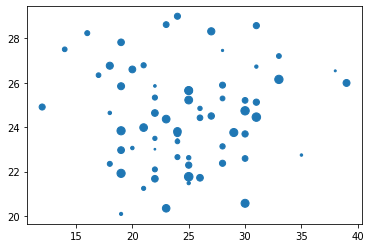

In [34]:
# build the scatter plots for urban cities 
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=urban_driver_count)

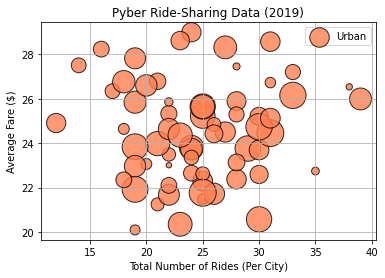

In [37]:
# Build the urban cities scatter plot 
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c='coral',
            edgecolor = 'black', linewidths = 1,
            alpha = 0.8, label='Urban')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# add legend 
plt.legend()

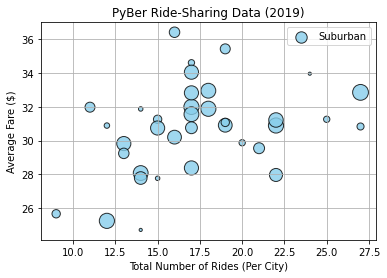

In [40]:
# build the suburban cities scatter plot 
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

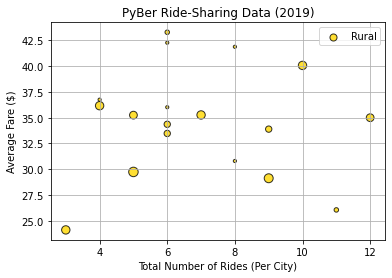

In [41]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

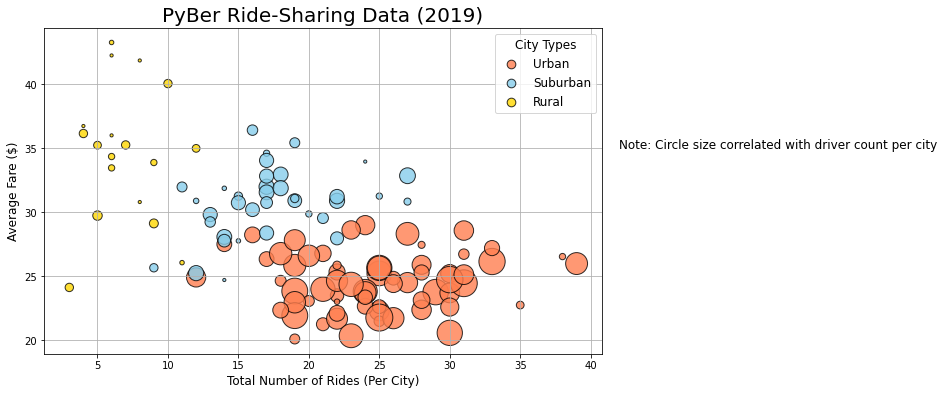

In [55]:
# Build the scatter charts for each city type.
#This line makes the figure bigger

plt.subplots(figsize=(10, 6))

# build the 3 charts 
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Set the legend to all be the same size 
lgnd = plt.legend(fontsize='12', mode = 'Expanded',
                  scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# add text label 
plt.text(42, 35, 'Note: Circle size correlated with driver count per city', fontsize = 12)

# Save the figure 
plt.savefig('analysis/fig1.png')
# Show the plot
plt.show()